# Linear and logistic regression

## Linear regression

As ever, let's first load the data:

In [1]:
import pandas as pd
import sklearn.datasets as ds
import matplotlib.pyplot as plt

# Load example data for regression
dataset_reg = ds.fetch_california_housing(as_frame=True)
# Parameter as_frame = True: the data is a pandas DataFrame including columns with appropriate dtypes (numeric, string or categorical).

Then we have an overview on the dataset.

In [3]:
# to obtain a description of the data
print(dataset_reg.DESCR)

# you may want to see the difference between line 2 and what is following
# print(dataset_reg)

{'data':        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -1

In [5]:
# and print the head of the data.
X_reg = dataset_reg['data']
y_reg = dataset_reg['target']
# They are both actual values.

print(X_reg.head())
print(y_reg.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64


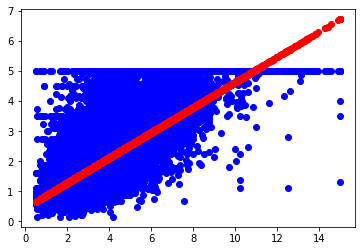

In [6]:
from sklearn.linear_model import LinearRegression

# We select one independent variable (x)
x_val = X_reg[['MedInc']]

# Creation of the Linear Regression object (y object)
lin_r = LinearRegression()

# Fitting the data and obtain a linear model
lin_r.fit(x_val, y_reg) # we have already created y_reg before (line 3 In 10)

# Obtaining predictions (\hat{y}) using the linear model and selected independent variable (x)
y_prediction = lin_r.predict(x_val)

# Plotting the actual values
plt.scatter(x_val, y_reg, color = 'blue')

# Plotting the predicted values: formed a straight line for the prediction. It minimises the distances with all observations.
plt.scatter(x_val, y_prediction, color = 'red')

plt.show()

We can obtain the parameter estimates for $\beta_0$ and $\beta_1$ as follows:

In [14]:
# beta_1 / the slope of regression
print(lin_r.coef_)

# beta_0 / the intercept of regression on y-axis
print(lin_r.intercept_)

[0.41793849]
0.45085576703267827


## Logistic regression

First we load the data and have a view on it.

In [9]:
# Classification data
dataset_class = ds.load_breast_cancer()
X_class = pd.DataFrame(data = dataset_class['data'], columns = dataset_class['feature_names'])
y_class = pd.DataFrame(data = dataset_class['target'], columns = ['target'])
print(dataset_class.DESCR)
print(X_class.head())
print(y_class.head())

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

The we implement the logistic regression.

In [16]:
from sklearn.linear_model import LogisticRegression

# Again, we select a particular independent variable for our analysis
x_val = X_class[['mean perimeter']]

# Creating the LogisticRegression object
log_r = LogisticRegression(solver='liblinear')
# Parameter 'solver' defines the algorithm to use in the optimization problem. Default is ‘lbfgs’.
# To choose a solver, you might want to consider the following aspects:
    # For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones;
    # For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss;
# For more paramters, one can refer to https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


# Function .fit() requires inputs as arrays. What we have of y_class is a column from the data.
# So we need to reshape it, and then fit them in the model

# Fitting the data
# Return a Numpy representation of the DataFrame.
# Only the values in the DataFrame will be returned, the axes labels will be removed.
log_r.fit(x_val, y_class.values.reshape(-1,))
# For more information on .reshape(), please refer to https://numpy.org/doc/stable/reference/generated/numpy.reshape.html

# You may want to check what will happen without reshaping.
# log_r.fit(x_val, y_class)

# Then obtain predictions
prediction = log_r.predict(x_val)

In this case, plotting would not work out well since we only have two possible outcomes.

But we can calculate the number of correct predictions:

In [17]:
# initialise a variable
correct = 0

# for each actural value of samples, compare the predicted value with the actural; if they are equal, then number of correct prediction plus 1.
for pred, actual in zip(prediction, y_class.values):
    # .zip() accepts iterable items and merges them into a single tuple.
    # The resultant value is a zip object that stores pairs of iterables.
    # You can pass lists, tuples, sets, or dictionaries through the zip() function.

    if pred == actual:
        correct += 1
    
print("#Correct: ", correct, " out of ", len(prediction))

#Correct:  505  out of  569


There are many evaluation criteria we can use to evaluate both a regression and classification, so this was an initial visual and simple attempt at verifying our results.

Notice how similar the creation, fitting, and prediction of both models is. In general, the art is not in coding the models, but selecting the right one for the right occasion, and comparison.